# Homework 1 - Credit Analytics
Submission by Dennis Goldenberg

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime as dt

C:\Users\Dennis Goldenberg\AppData\Local\Temp\ipykernel_16432\290306499.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## $\text{\underline{Question 1}}$

### a. Proving $F(X) \sim \text{Uniform}(0,1)$
Note that $F(x) = \mathbb{P}(X \leq x)$ and the support of a probability function is $S(\mathbb{P}(\cdot)) = (0,1]$. Therefore:
$$
\begin{equation*}
F(X) = \mathbb{P}(X \leq X) = 1 \sim \text{Uniform}(0,1)
\end{equation*}
$$

### b. Proving $F^{-1}(U) \equiv X$
Let $U \sim \text{Uniform}(0,1)$. Note that, via the definition of inverse function:
$$
\begin{equation*}
F^{-1}\left(F(X)\right) = X
\end{equation*}
$$
From a, $F(X) \equiv U(0,1)$, so $F^{-1}\left(U\right) \equiv F^{-1}\left(F(X)\right)$. So:
$$
\begin{equation*}
F^{-1}\left(U\right) \equiv F^{-1}\left(F(X)\right) = X \rightarrow F^{-1}\left(U\right) \equiv X
\end{equation*}
$$

### c. Proving $\Phi^{-1}(F(X)) \equiv Y \sim N(0,1)$
From a, $F(X) \equiv U(0,1)$. Note that $F(y) = \Phi(y)$. Using the result from b:
$$
\begin{equation*}
\Phi^{-1}(F(X)) \equiv \Phi^{-1}(U) = F_{Y}^{-1}(U) \equiv Y
\end{equation*}
$$
Thus, $\Phi^{-1}(F(X)) \equiv Y \sim N(0,1)$.

## $\text{\underline{Question 2}}$

### a. Deriving survival function
Note that, from a formula in class, $S(t) = \mathbb{P}(\tau > t) = e^{-\int_0^{t}h(s)ds}$. Thus, I have:
$$ 
\begin{align*}
S(t) = e^{-\int_0^{t}\alpha e^{\beta s}ds} = e^{-\alpha\int_0^{t}e^{\beta s}ds} &= e^{-\alpha\left[\frac{1}{\beta}e^{\beta s}\right]_{0}^{t}} = e^{-\frac{\alpha}{\beta}\left[e^{\beta t} - 1\right]} = e^{\frac{\alpha}{\beta} - \frac{\alpha}{\beta}e^{\beta t}}
\end{align*}
$$

### b. Deriving the distribution function
Using the fact that $S(t) = 1 - F(t) \rightarrow F(t) + S(t) = 1 \rightarrow F(t) = 1 - S(t)$, I compute:
$$
\begin{equation*}
F(t) = 1 - S(t)  = 1 - e^{\frac{\alpha}{\beta} - \frac{\alpha}{\beta}e^{\beta t}} 
\end{equation*}
$$

### c. Deriving the density function 
The density function is the derivative of the disrtibution function. I use this and apply the chain rule for derivatives:
$$
\begin{align*}
f(t) = \frac{d}{dt}F(t) = \frac{d}{dt}\left(1 - e^{\frac{\alpha}{\beta} - \frac{\alpha}{\beta}e^{\beta t}}\right) &= -e^{\frac{\alpha}{\beta}}\frac{d}{dt}\left(e^{-\frac{\alpha}{\beta}e^{\beta t}}\right)\\
&= -e^{\frac{\alpha}{\beta}} * e^{-\frac{\alpha}{\beta}e^{\beta t}} * \frac{d}{dt}\left(-\frac{\alpha}{\beta}e^{\beta t}\right)\\
&= -e^{\frac{\alpha}{\beta}} * e^{-\frac{\alpha}{\beta}e^{\beta t}} * -\alpha e^{\beta t}\\
&= \alpha e^{\beta t +\frac{\alpha}{\beta} - \frac{\alpha}{\beta}e^{\beta t}}\\
&= \alpha e^{\beta t + \frac{\alpha}{\beta}\left(1 - e^{\beta t}\right)}
\end{align*}
$$

## $\text{\underline{Question 3}}$

### a. Calculating Expected Value and Variance for Payout at Default
Note that the probability of default at any specific time is given by the hazard function $h(t) = h$, as the hazard function is the probability of default conditional on survival up until that point. Further, since 100 dollars is paid out at time of default, and an instantaneous forward rate is $r(t) = r$, I calculate the discount factor from time $t$ back to to time 0 as:
$$
D(0,t) = e^{-\int_0^{t}r(s)ds} = e^{-\int_0^{t}rds} = e^{-rt}
$$
Thus, the present value of a contract that defaults at time $t$ is:
$$
PV(C|\text{Default at time t}) = 100e^{-rt}
$$
The payout for no default is 0, so this does not have to be discounted to the present, as it will still be 0. Therefore, I calculate the expected value:
$$
\begin{align*}
\mathbb{E}[PV(C)] = \int_0^{T}PV_t(C)*\mathbb{P}(\text{default at }t)dt &= \int_0^{T}100e^{-rt}*hdt\\
&= 100h\int_0^{T}e^{-rt}dt\\
&= 100h\left[\frac{-1}{r}e^{-rt}\right]_0^T\\
&= \frac{100h}{r}\left(1 - e^{-rT}\right)
\end{align*}
$$
For variance, I use a common relation of variance to calculate:
$$
\begin{align*}
Var[PV(C)] = \mathbb{E}[PV(C)^2] - \mathbb{E}[PV(C)]^2 &= \int_0^{T}PV_t(C)^2*\mathbb{P}(\text{default at }t)dt - \left(\frac{100h}{r}\left(1 - e^{-rT}\right)\right)^2\\
&= \int_0^{T}\left(100e^{-rt}\right)^2*h dt - \frac{10,000h^2}{r^2}\left(1 - e^{-rT}\right)^2\\
&= 10,000h\int_0^{T}e^{-2rt}dt - \frac{10,000h^2}{r^2}\left(1 - e^{-rT}\right)^2\\
&= 10,000h\left[\frac{-1}{2r}e^{-2rt}\right]_0^{T} - \frac{10,000h^2}{r^2}\left(1 - e^{-rT}\right)^2\\
&= 10,000h * \frac{1}{2r}\left(1 - e^{-2rT}\right)- \frac{10,000h^2}{r^2}\left(1 - e^{-rT}\right)^2\\
&= \frac{5,000h}{r}\left(1 - e^{-2rT}\right) - \frac{10,000h^2}{r^2}\left(1 - e^{-rT}\right)^2\\
&= \frac{5,000h}{r}\left(1 - e^{-rT}\right)\left(1 + e^{-rT}\right) - \frac{10,000h^2}{r^2}\left(1 - e^{-rT}\right)^2\\
&= \frac{5000h}{r}\left(1 - e^{-rT}\right)\left(1 + e^{-rT} - \frac{2h}{r}\left(1 - e^{-rT}\right)\right)
\end{align*}
$$

### b. Calculate Expected Value, Variance for Payout if No Default

Here, I note that $PV(C) = \sum_{t = 1}^{T}PV(CF_t)$. In this case:
$$
PV(CF_t) = \begin{cases} 0 & \text{ if default before t} \\ 100e^{-rt} & \text{ if survive until t}\end{cases}
$$
Since the hazard rate is a constant $h$, then the underlying distribution of default time is $\text{Exponential}(h)$. Therefore, the probability of survival until year $t$ is $S(t) = e^{-ht}$. Therefore:
$$
\mathbb{E}\left[PV(CF_t)\right] = 0 * \mathbb{P}(\text{default before t}) + 100e^{-rt} * \mathbb{P}(\text{Survive until t}) = 100e^{-rt}e^{-ht} = 100e^{-(r + h)t}
$$
I can then calculate the expected value of the present value using the sum of a geometric series:
$$
\begin{align*}
\mathbb{E}[PV(C)] = \mathbb{E}\left[\sum_{t = 1}^{T}PV(CF_t)\right] &= \sum_{t = 1}^{T}\mathbb{E}\left[PV(CF_t)\right]\\
&=\sum_{t = 1}^{T}100e^{-(r + h)t}\\
&=100\sum_{t = 1}^{T}e^{-(r + h)t}\\
&=100\left(\frac{e^{-(r + h)} - e^{-(r + h)(T + 1)}}{1 - e^{-(r + h)}}\right)\\
&=100e^{-(r + h)}\left(\frac{1 - e^{-(r + h)T}}{1 - e^{-(r + h)}}\right)\\
&=\frac{100e^{-(r + h)}}{1 - e^{-(r + h)}}\left(1 - e^{-(r + h)T}\right)
\end{align*} 
$$

## $\underline{\text{Question 4}}$

### a. Calculating the covariance matrix
I first import the data (and linearly interpolate for the missing maturities):

In [20]:
ticker = ['DGS1MO',  'DGS3MO', 'DGS6MO','DGS1','DGS2',
           'DGS3', 'DGS5','DGS7', 'DGS10','DGS20','DGS30']
#ticker = ['DGS1MO',  'DGS3MO', 'DGS6MO','DGS1','DGS2',
#           'DGS3', 'DGS4','DGS5','DGS6','DGS7','DGS8',
#           'DGS9', 'DGS10', 'DGS15','DGS20','DGS30']
sdt = dt.datetime(2012, 2, 2)
edt = dt.datetime(2023, 2, 3)
source = 'fred'
yieldcurve = pd.DataFrame(web.DataReader(ticker, source, sdt, edt))
yieldcurve = yieldcurve.dropna()
yieldcurve.insert(np.where(yieldcurve.columns.values == 'DGS3')[0][0] + 1,
                 "DGS4",round(0.5*yieldcurve["DGS3"] + 0.5*yieldcurve["DGS5"],2))
yieldcurve.insert(np.where(yieldcurve.columns.values == 'DGS5')[0][0] + 1,
                 "DGS6",round(0.5*yieldcurve["DGS5"] + 0.5*yieldcurve["DGS7"],2))
yieldcurve.insert(np.where(yieldcurve.columns.values == 'DGS7')[0][0] + 1,
                 "DGS8",round((2/3)*yieldcurve["DGS7"] + (1/3)*yieldcurve["DGS10"],2))
yieldcurve.insert(np.where(yieldcurve.columns.values == 'DGS8')[0][0] + 1,
                 "DGS9",round((1/3)*yieldcurve["DGS7"] + (2/3)*yieldcurve["DGS10"],2))
yieldcurve.insert(np.where(yieldcurve.columns.values == 'DGS10')[0][0] + 1,
                 "DGS15",round((0.5)*yieldcurve["DGS10"] + (0.5)*yieldcurve["DGS20"],2))
yieldcurve.to_csv('yieldcurvenona.csv')

Then, I generate the covariance matrix for the maturities specified in the problem:

In [21]:
curveForPCA = yieldcurve[['DGS1','DGS2','DGS3','DGS4','DGS5',
                          'DGS6','DGS7','DGS8','DGS9','DGS10','DGS15','DGS20','DGS30']]
covMatrix = curveForPCA.cov()
covMatrix

,DGS1,DGS2,DGS3,DGS4,DGS5,DGS6,DGS7,DGS8,DGS9,DGS10,DGS15,DGS20,DGS30
DGS1,1.254743,1.163028,1.056362,0.943845,0.831012,0.749017,0.667030,0.612353,0.557830,0.503152,0.429241,0.355424,0.228736
DGS2,1.163028,1.105380,1.022073,0.923616,0.824877,0.748844,0.672816,0.619826,0.566992,0.514002,0.440818,0.367693,0.244958
DGS3,1.056362,1.022073,0.962211,0.881505,0.800539,0.733968,0.667408,0.618746,0.570213,0.521552,0.452688,0.383862,0.269193
DGS4,0.943845,0.923616,0.881505,0.818272,0.754794,0.699463,0.644156,0.602204,0.560337,0.518385,0.457012,0.395667,0.293242
DGS5,0.831012,0.824877,0.800539,0.754794,0.708867,0.664816,0.620802,0.585598,0.550436,0.515232,0.461390,0.407564,0.317476
DGS6,0.749017,0.748844,0.733968,0.699463,0.664816,0.629212,0.593627,0.564201,0.534787,0.505361,0.458606,0.411866,0.332040
DGS7,0.667030,0.672816,0.667408,0.644156,0.620802,0.593627,0.566504,0.542858,0.519193,0.495546,0.455877,0.416220,0.346659
DGS8,0.612353,0.619826,0.618746,0.602204,0.585598,0.564201,0.542858,0.523908,0.504898,0.485948,0.452130,0.418328,0.356754
DGS9,0.557830,0.566992,0.570213,0.560337,0.550436,0.534787,0.519193,0.504898,0.490566,0.476271,0.448277,0.420303,0.366705
DGS10,0.503152,0.514002,0.521552,0.518385,0.515232,0.505361,0.495546,0.485948,0.476271,0.466673,0.444530,0.422411,0.376800


I immediately notice that the diagonals in the matrix, corresponding to the invidual variances of the zero rates, are decreasing with increasing terms. This is intuitive, as shorter zero rates are more volatile (and therefore should have higher standard deviation and variance) than long-term rates. Also, I notice that the highest covariances in each row and column are between zero rates of similar maturity (i.e the the zero-rate for a 3 year maturity has a much higher correlation with the zero-rate for a 2 year maturity than the zero-rate for 30 year maturity). Since maturity dates are close together, it makes sense that their yields would move in tandem.

### b. Performing PCA

First, I find the total variation of the data by summing the variance-covariance matrix:

In [45]:
print("Total Variation: ", np.sum(covMatrix.values))

Total Variation:  93.81227139164781


Then, I perform PCA and find the percentage of variation explained by 1 factor, 2 factors, and then 3:

In [47]:
pca = PCA()
pcaFit = pca.fit(curveForPCA)
pVE = np.cumsum(pca.explained_variance_ratio_)
print("Percent Explained by 1 factor: {p: .2f}%".format(p = pVE[0] * 100))
print("Percent Explained by 2 factos: {p: .2f}%".format(p = pVE[1] * 100))
print("Percent Explained by 3 factos: {p: .2f}%".format(p = pVE[2] * 100))

Percent Explained by 1 factor:  86.69%
Percent Explained by 2 factos:  98.69%
Percent Explained by 3 factos:  99.83%


I confirm this is true by performing singular value decomposition on the centered matrix of rates for maturities, and then squaring the singular values to find proportion of explained variance for the first 3 factors:

In [50]:
centered = curveForPCA - np.average(curveForPCA, axis = 0)
U,S,V_T = np.linalg.svd(centered)
EVP = np.cumsum(S**2)/np.sum(S**2)
print("Explained by 1: {p1: .2f}%, 2: {p2: .2f}%, 3: {p3: .2f}%".format(
    p1 = EVP[0]*100, p2 = EVP[1]*100, p3 = EVP[2]*100))

Explained by 1:  86.69%, 2:  98.69%, 3:  99.83%


Now, I take the first three componenents, and plot their factor loadings against the maturity time they correspond to:

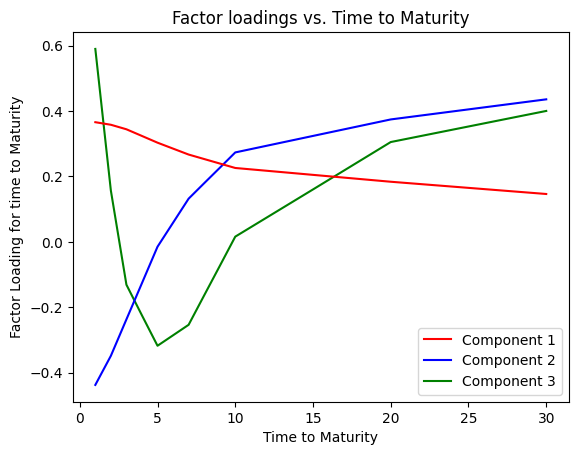

In [79]:
f_1, f_2, f_3 = pcaFit.components_[0:3]
yvec = np.array([1, 2, 3, 4, 5,6, 7,8,9, 10, 15, 20, 30])
lFrame = pd.DataFrame(data = np.transpose([yvec, f_1, f_2, f_3]), 
                      columns = ["Time to Maturity", "Comp. 1", "Comp. 2", "Comp. 3"])
lFrame["Time to Maturity"] = lFrame["Time to Maturity"].astype(int)

plt.plot(lFrame["Time to Maturity"], lFrame["Comp. 1"], color = 'red',
          label = 'Component 1', zorder = 3)
plt.plot(lFrame["Time to Maturity"], lFrame["Comp. 2"], color = 'blue',
          label = 'Component 2', zorder = 2)
plt.plot(lFrame["Time to Maturity"], lFrame["Comp. 3"], color = 'green',
          label = 'Component 3', zorder = 1)
plt.xlabel("Time to Maturity")
plt.ylabel("Factor Loading for time to Maturity")
plt.title("Factor loadings vs. Time to Maturity")
plt.legend()
plt.show()

Note that the first component has all positive factor loadings; this corresponds to a parallel shift in the yield curve, as all rates go up (or down) together. This component explains about $86.69\%$ of the variance, so most movements in the yield curve can be explained by said parallel shift. The second component has negative factor loadings for the short term but positive for the long term; this corresponds to a twisting of a term structure. This would mean that the yield curve increased in the short term while decreasing in the long term - or visa versa - which is typical of a change in the phase of the economic cycle. The second component explains an additional $98.69 - 86.69 = 12\%$ of the variance, so it is significant. The third componnent has positive factor loadings for both short term maturity and long term maturity, but negative factor loadings in the middle, with the inflection point coming at 5 years.

## $\underline{\text{Question 5}}$